In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [95]:
data = pd.read_csv('data/default.csv')
data.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,30001,82,3,8,5,57,12,12,12,12,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,ID,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [96]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


Плохо считали колонки. Переделеаем

In [97]:
data = pd.read_csv('data/default.csv', header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [98]:
data = data.drop(columns=['ID'])
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [99]:
data['default'] = data['default payment next month']
data.drop(columns=['default payment next month'], inplace=True)

In [100]:
target_column = 'default'

categorical_columns = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
]

numerical_columns = [col for col in data.columns if (col not in categorical_columns) and (col != target_column)]

In [101]:
numerical_columns

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [102]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [103]:
data.dropna(inplace=True)
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [104]:
data.drop_duplicates()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


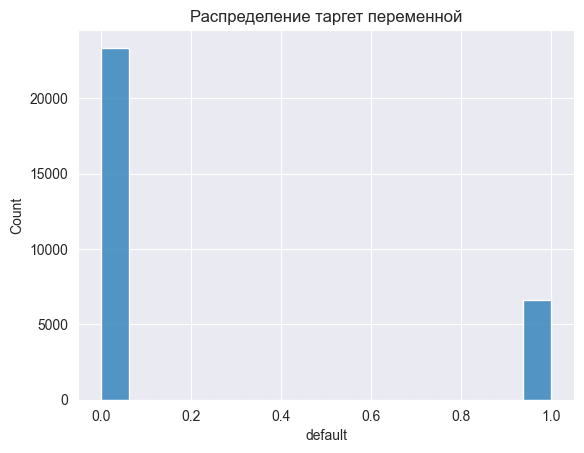

In [105]:
sns.histplot(data['default'])
plt.title(f"Распределение таргет переменной")
plt.show()

In [106]:
def is_int(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

for column in data.columns:
    data = data[data[column].apply(is_int)]
data.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [107]:
data.dtypes

LIMIT_BAL     int64
SEX           int64
EDUCATION     int64
MARRIAGE      int64
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1    object
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [108]:
for column in data.columns:
    data[column] = data[column].astype(int)
data.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

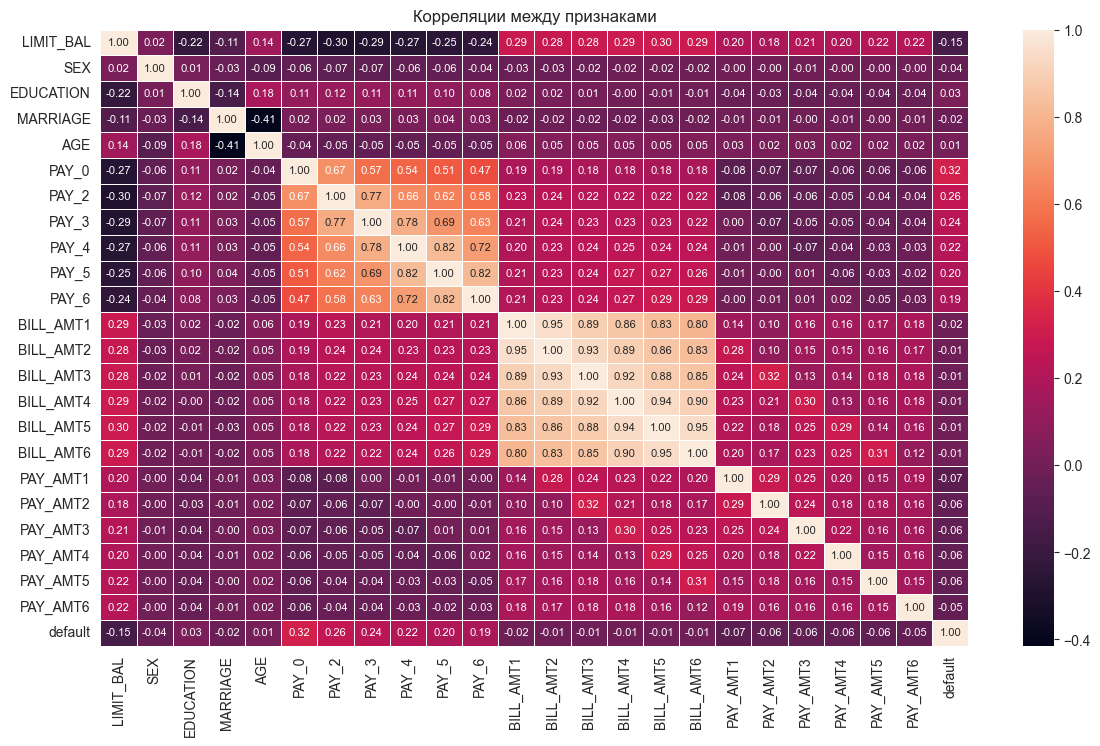

In [109]:
# корреляция
correlation_matrix = data.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 8},
)
plt.title("Корреляции между признаками")
plt.show()

In [110]:
data.shape

(29999, 24)

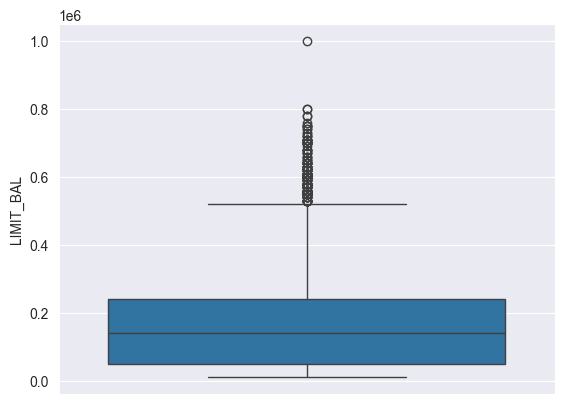

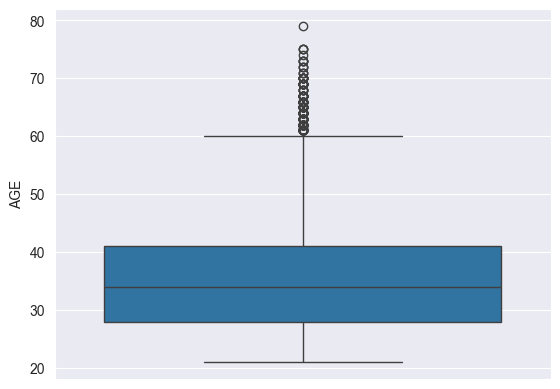

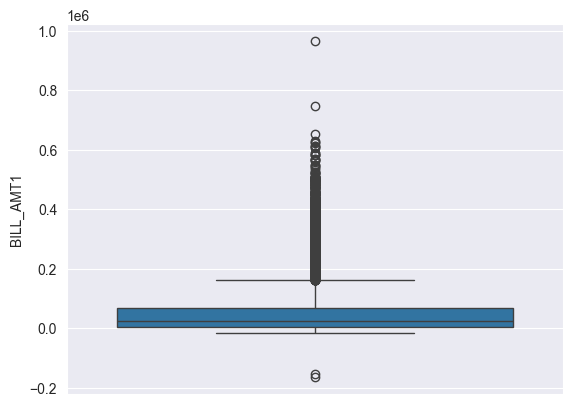

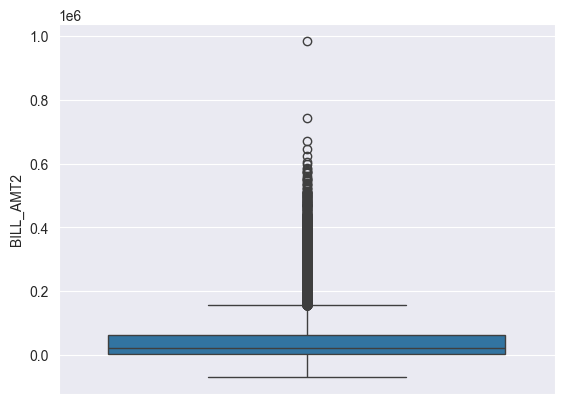

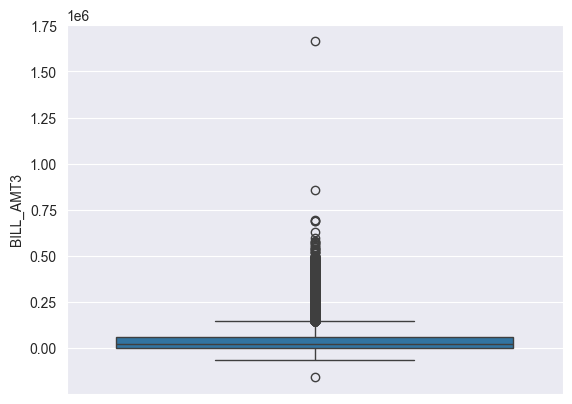

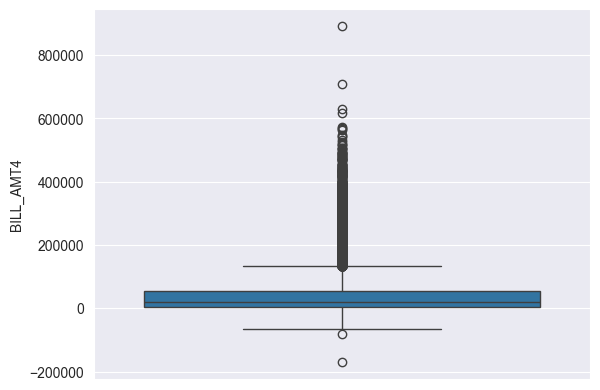

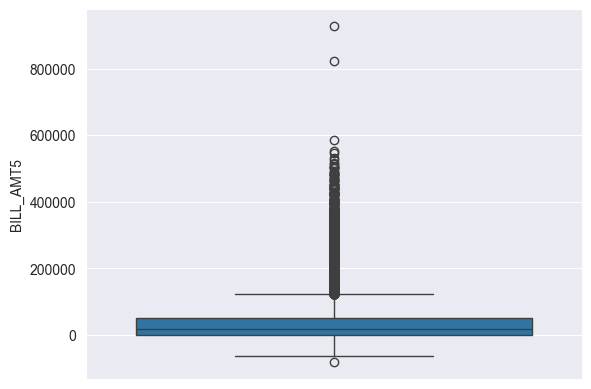

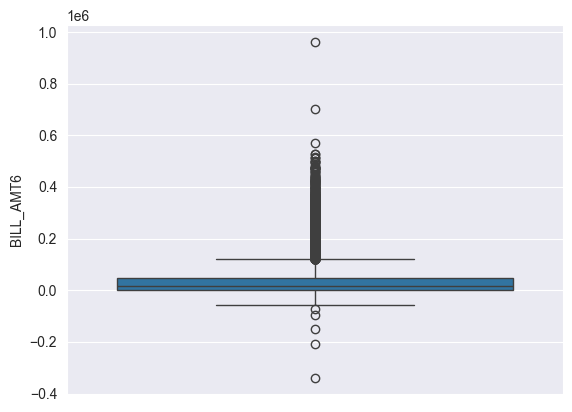

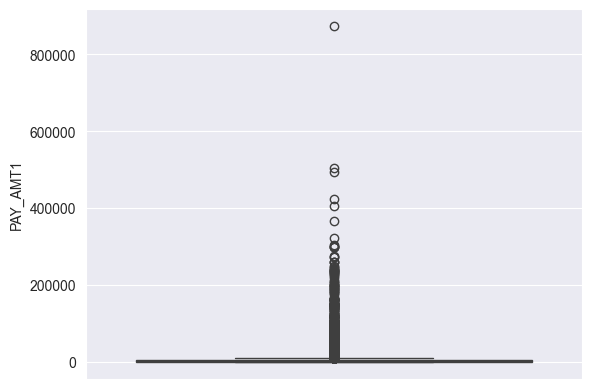

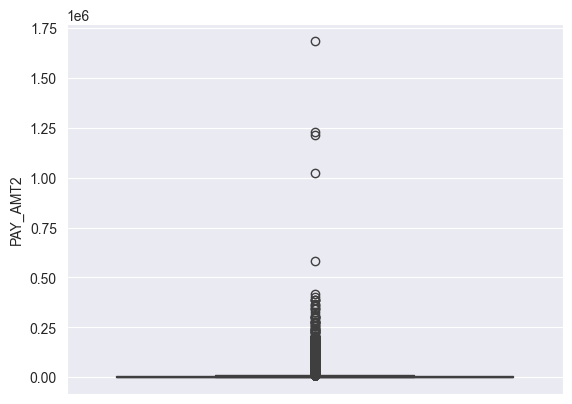

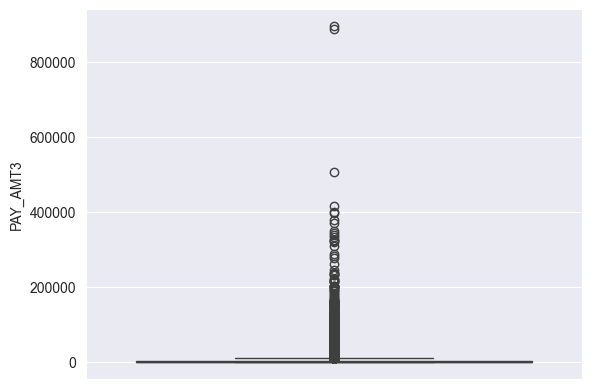

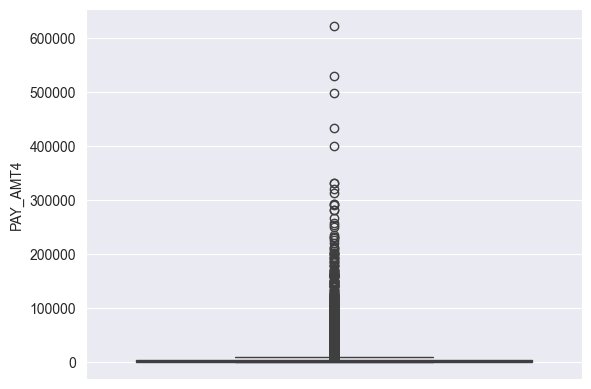

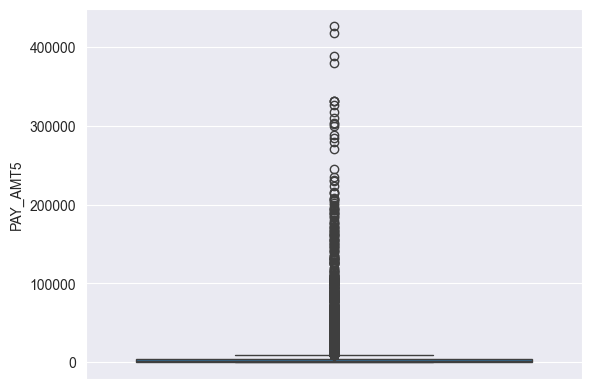

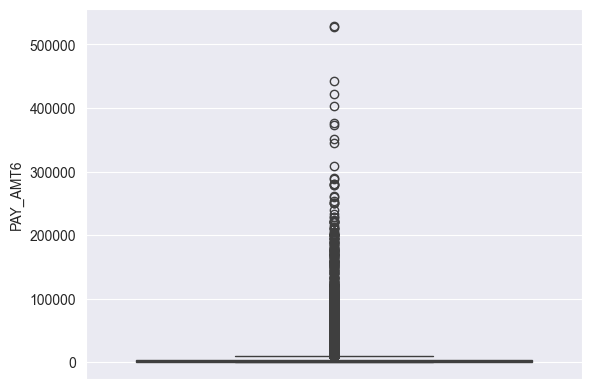

In [111]:
for column in numerical_columns:
    sns.boxplot(data[column])
    plt.show()

In [112]:
#  базовые статистики
basic_stats = data.describe()
basic_stats.T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29999.0,167486.572219,129749.239105,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29999.0,1.603720,0.489132,1.0,1.0,2.0,2.0,2.0
EDUCATION,29999.0,1.853128,0.790361,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29999.0,1.551852,0.521972,0.0,1.0,2.0,2.0,3.0
AGE,29999.0,35.485916,9.217776,21.0,28.0,34.0,41.0,79.0
PAY_0,29999.0,-0.016701,1.123820,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29999.0,-0.133738,1.197195,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29999.0,-0.166172,1.196878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29999.0,-0.220674,1.169157,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29999.0,-0.266209,1.133205,-2.0,-1.0,0.0,0.0,8.0


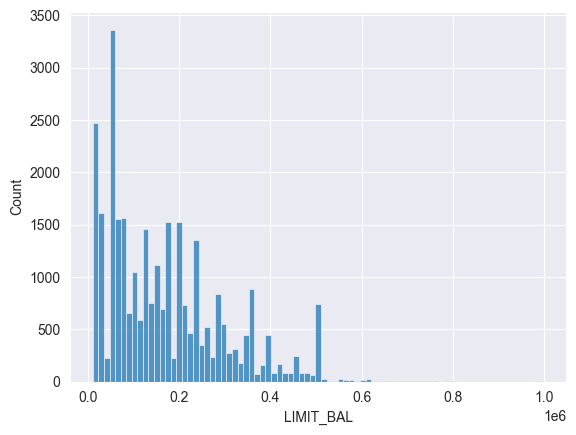

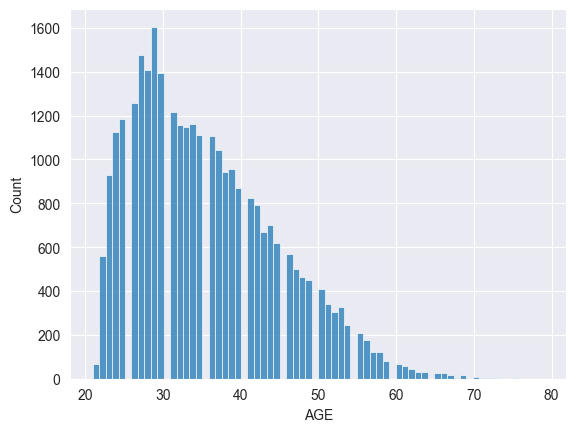

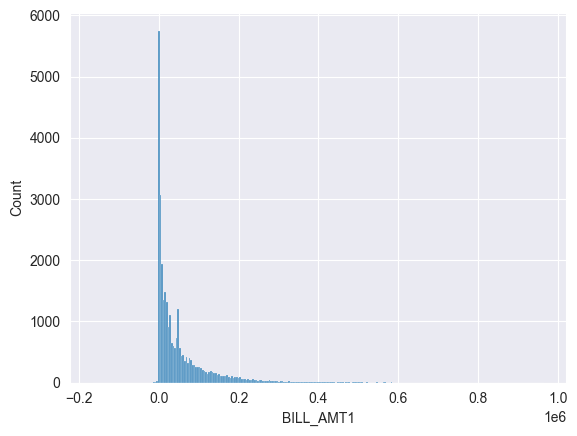

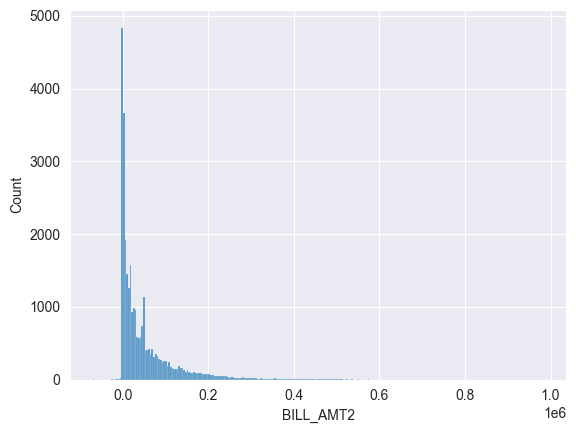

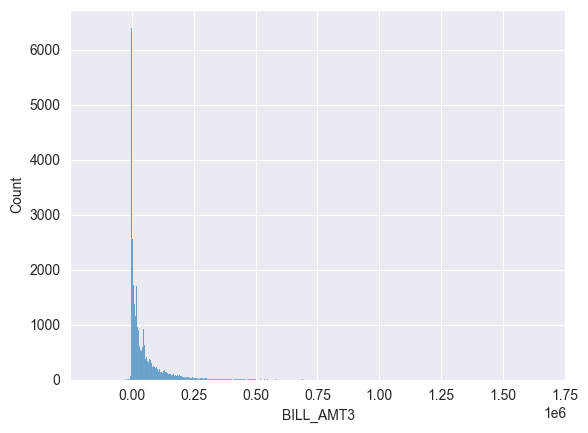

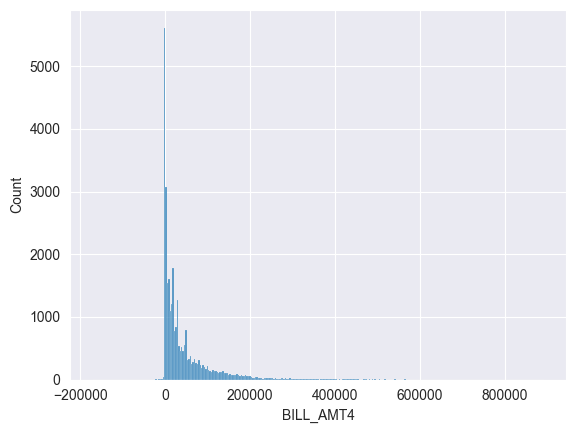

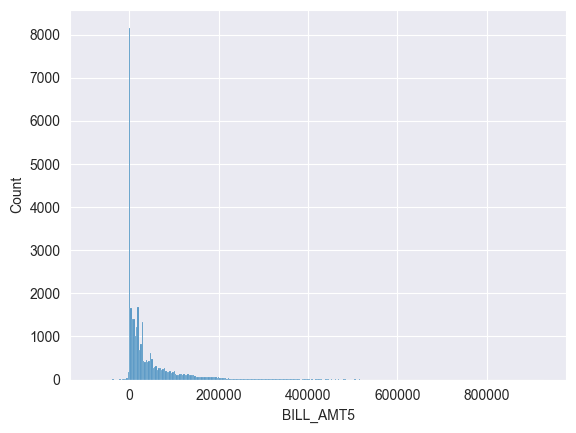

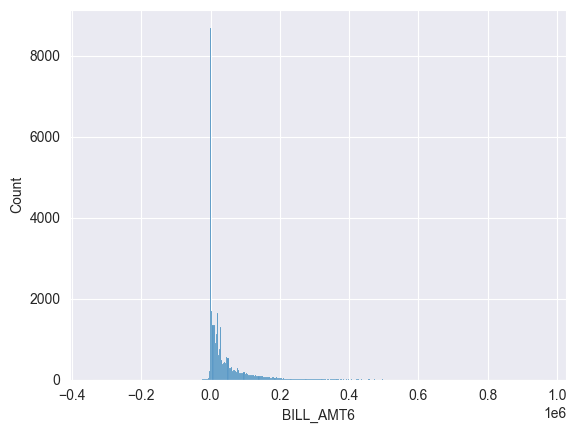

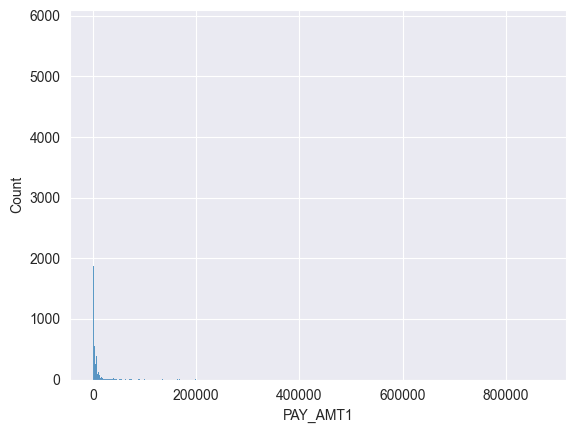

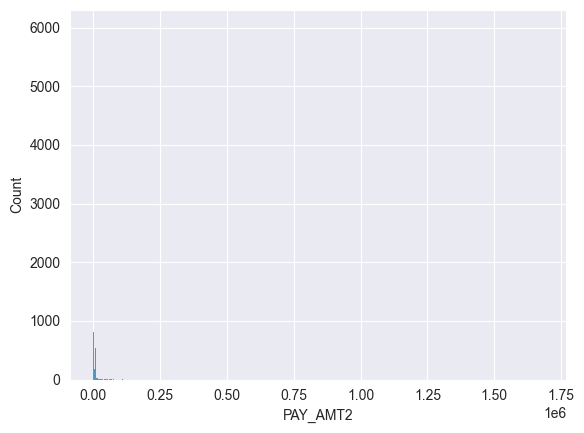

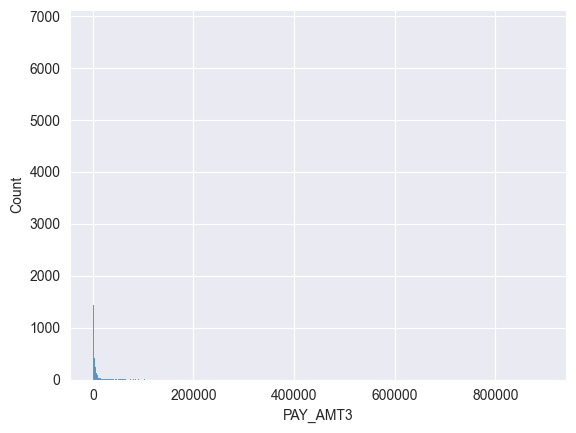

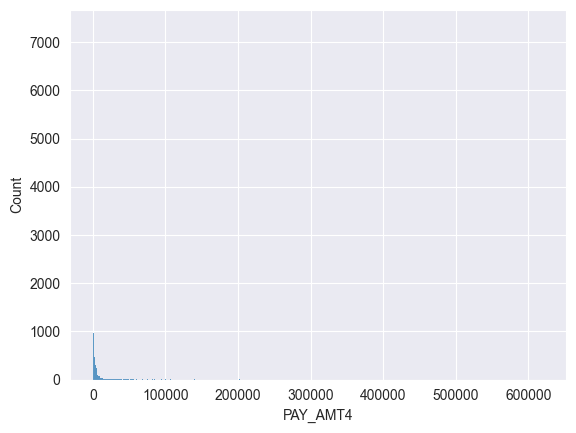

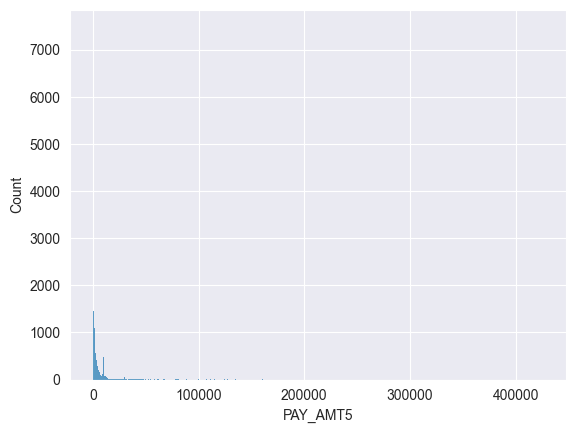

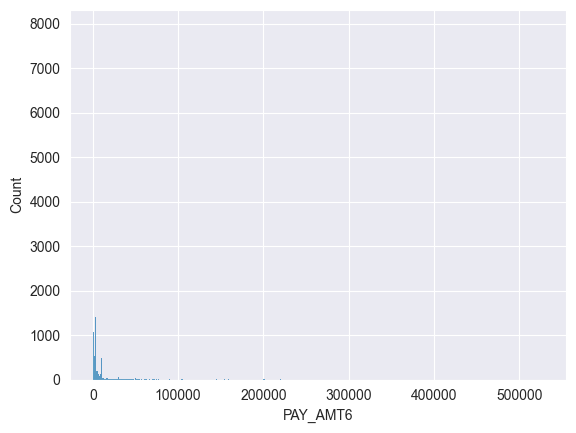

In [113]:
for column in numerical_columns:
    sns.histplot(data[column])
    plt.show()

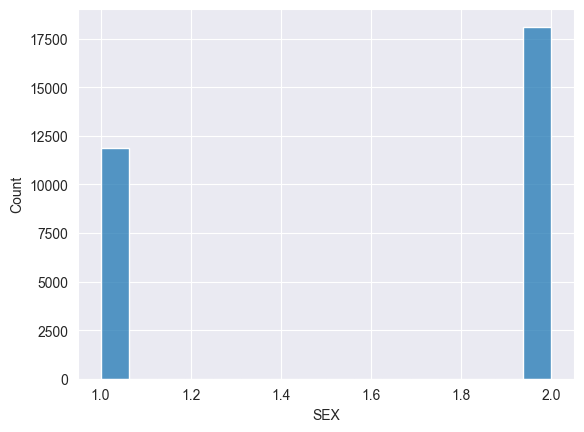

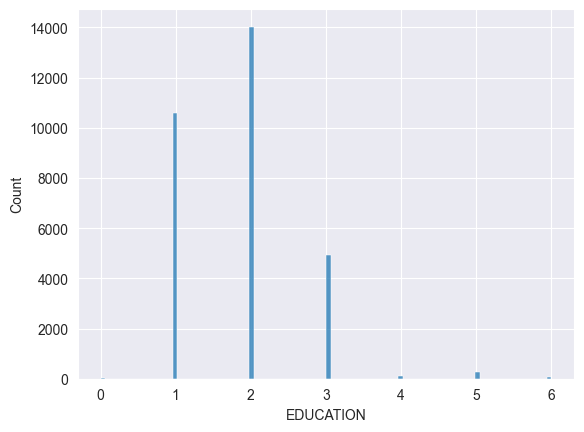

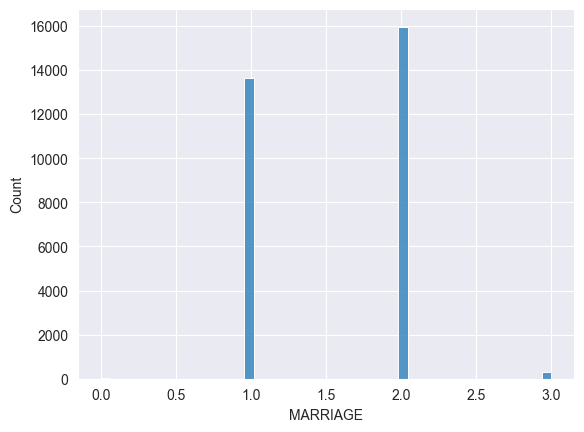

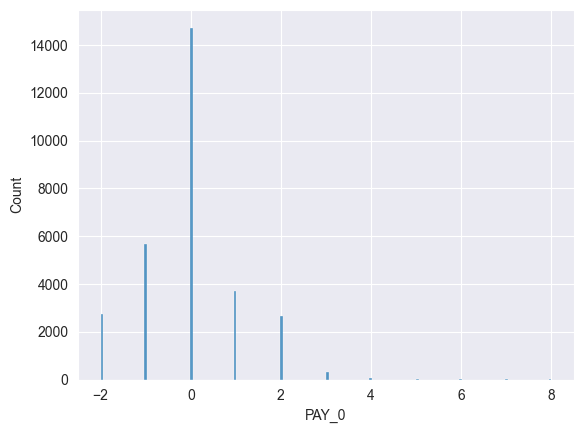

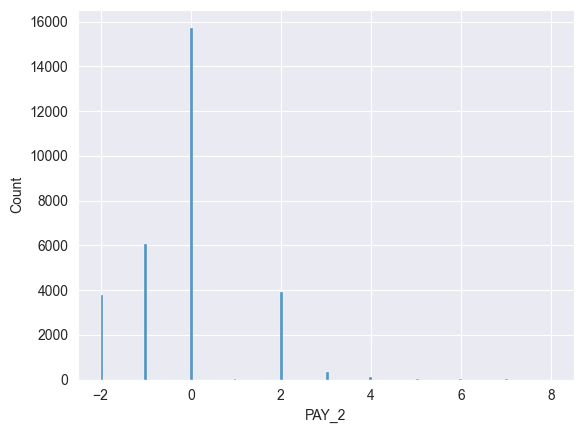

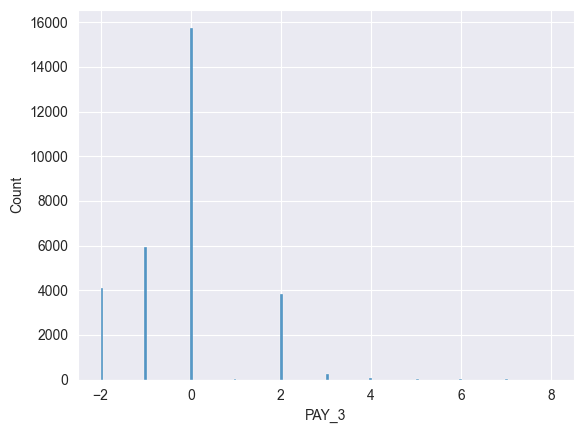

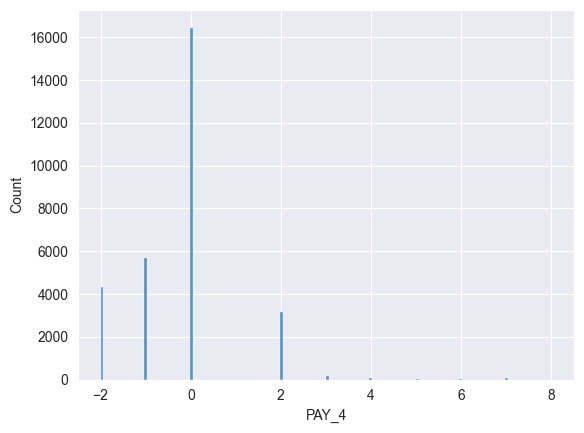

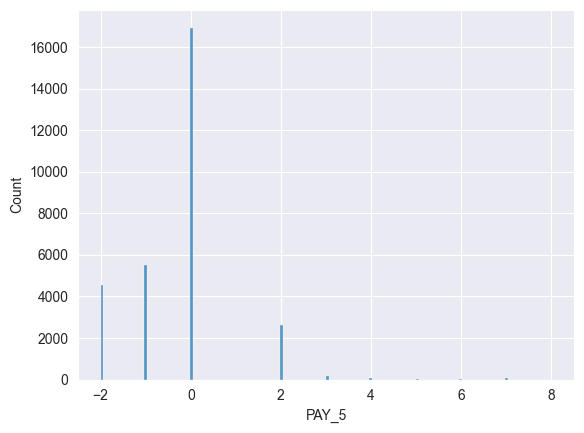

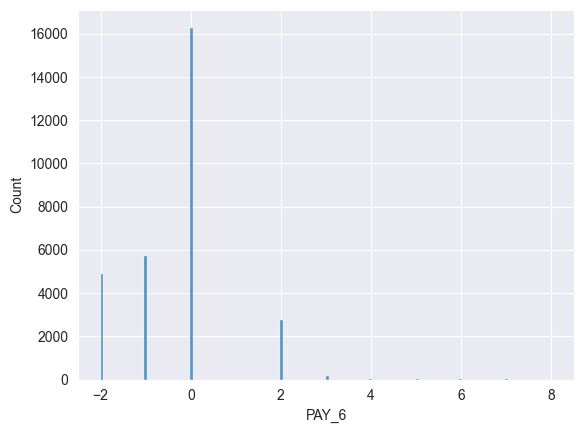

In [114]:
for column in categorical_columns:
    sns.histplot(data[column])
    plt.show()

In [123]:
# разделим на тестовую и обучающую выборки и закодируем текст как вектор

X = data.drop(columns=['default'])
y = data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# классификаторы
logistic_regression_cls = LogisticRegression(random_state=42)
decision_tree_cls = DecisionTreeClassifier(random_state=42)

# обучение модели
logistic_regression_cls.fit(X_train, y_train)
decision_tree_cls.fit(X_train, y_train)

None

/Users/mdmkudryashov/PycharmProjects/hse-ml-hw-1/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [125]:
# предсказание результатов
y_pred_log = logistic_regression_cls.predict(X_test)
y_pred_tree = decision_tree_cls.predict(X_test)

y_pred_proba_log = logistic_regression_cls.predict_proba(X_test)[:, 1]
y_pred_proba_tree = decision_tree_cls.predict_proba(X_test)[:, 1]

In [127]:
from sklearn.metrics import classification_report

# precision, recall, f1
print("Метрики для логистической регрессия:")
print(classification_report(y_test, y_pred_log))

Метрики для логистической регрессия:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4671
           1       0.00      0.00      0.00      1329

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000



In [128]:
# precision, recall, f1
print("Метрики для дерева решений:")
print(classification_report(y_test, y_pred_tree))

Метрики для дерева решений:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      4671
           1       0.40      0.44      0.42      1329

    accuracy                           0.73      6000
   macro avg       0.62      0.63      0.62      6000
weighted avg       0.74      0.73      0.73      6000



In [129]:
def show_confusion_matrix(y_pred, title: str):
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title(title)
    plt.show()

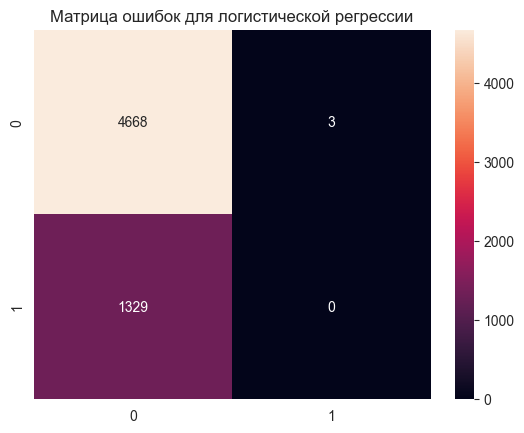

In [130]:
show_confusion_matrix(y_pred_log, "Матрица ошибок для логистической регрессии")

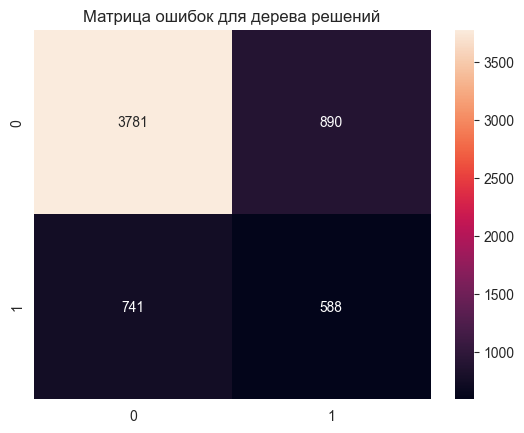

In [131]:
show_confusion_matrix(y_pred_tree, "Матрица ошибок для дерева решений")

In [132]:
fpr_log, tpr_log, _ = roc_curve(y_test, logistic_regression_cls.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree_cls.predict_proba(X_test)[:, 1])

roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

print(f"Логистическая регрессия: ROC AUC = {roc_auc_log:.4f}")
print(f"Дерево решений: ROC AUC = {roc_auc_tree:.4f}")

Логистическая регрессия: ROC AUC = 0.6590
Дерево решений: ROC AUC = 0.6269


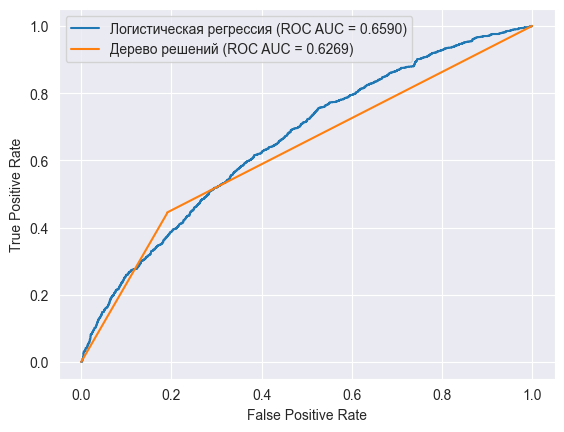

In [134]:
from sklearn.metrics import auc

plt.plot(fpr_log, tpr_log, label=f"Логистическая регрессия (ROC AUC = {auc(fpr_log, tpr_log):.4f})")
plt.plot(fpr_tree, tpr_tree, label=f"Дерево решений (ROC AUC = {auc(fpr_tree, tpr_tree):.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

   Ответьте на следующие вопросы в рамках итогового отчета:
   - Какие преобразования данных оказались наиболее важными для качества модели? Почему?
   - Какая модель показала лучшие результаты? Почему, на ваш взгляд?
   - Приведите примеры, как данная модель может быть применена на практике в конкретной бизнес-задаче.